In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from cdo import Cdo

In [2]:
LENTIS_PATH = "/net/pc200256/nobackup/users/most/LENTIS/"
LENTIS_REGRID = "/net/pc230050/nobackup/users/duinen/LENTIS/"
data = xr.open_dataset(os.path.join(LENTIS_PATH, "raw2_2000.nc"))
data_regrid = xr.open_dataset(os.path.join(LENTIS_REGRID, "raw2_2000_regrid.nc"))
era5_d = xr.open_dataset(os.path.join(LENTIS_REGRID, "ERA5_rsds_2000.nc"))

In [3]:
data_LENTIS = xr.open_dataset(os.path.join(LENTIS_PATH, "present/day/rsds_d/rsds_d_ECEarth3_h010.nc"))

In [7]:
xr.open_dataset(os.path.join(LENTIS_PATH, "raw2_2000.nc"))

<xarray.Dataset>
Dimensions:    (longitude: 225, latitude: 153, time: 8784)
Coordinates:
  * longitude  (longitude) float32 -15.0 -14.75 -14.5 -14.25 ... 40.5 40.75 41.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:00:00
Data variables:
    ssrd       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-26 05:24:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
gridfile = xr.open_dataset(os.path.join(LENTIS_PATH, 'LENTIS_gridarea.nc'))

In [5]:
era5_d

<xarray.Dataset>
Dimensions:    (time: 366, bnds: 2, lon: 155, lat: 68)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T11:00:00 ... 2000-12-31T11:00:00
  * lon        (lon) float64 -32.34 -31.64 -30.94 -30.23 ... 74.53 75.23 75.94
  * lat        (lat) float64 33.33 34.04 34.74 35.44 ... 78.25 78.95 79.65 80.35
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    ssrd       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Mar 04 13:25:43 2024: cdo daymean raw2_2000_regrid.nc E...
    frequency:    day
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

In [ ]:
timemean = data.ssrd.mean(dim = "time")
timemean_regrid = data_regrid.ssrd.mean(dim = "time")
timemean_lentis = data_LENTIS.rsds.mean(dim = "time")
timemean_era5 = era5_d.ssrd.mean(dim = "time")

: 

In [66]:
timemean_norm = timemean / 3600
timemean_regrid_norm = timemean_regrid / 3600
timemean_era5_norm = timemean_era5 / 3600

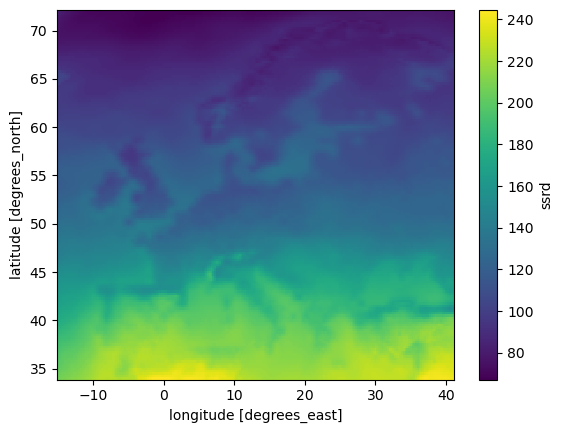

In [55]:
timemean_norm.plot()

In [70]:
diff = timemean_lentis - timemean_era5_norm

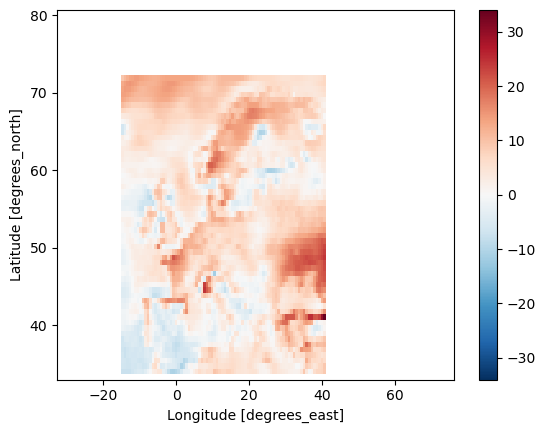

In [71]:
diff.plot()

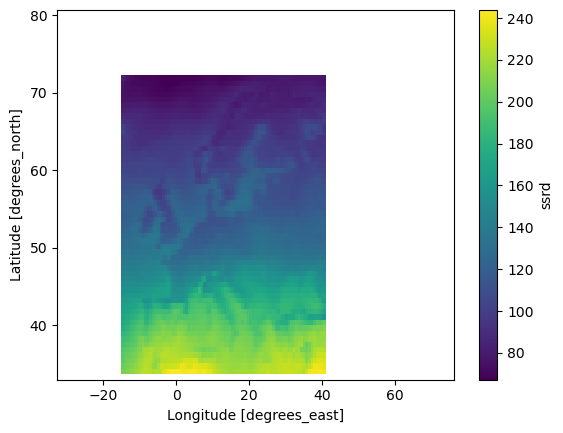

In [67]:
timemean_era5_norm.plot()

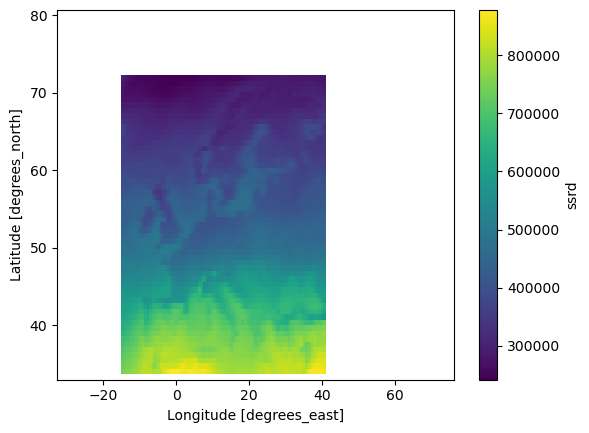

In [65]:
timemean_era5.plot()

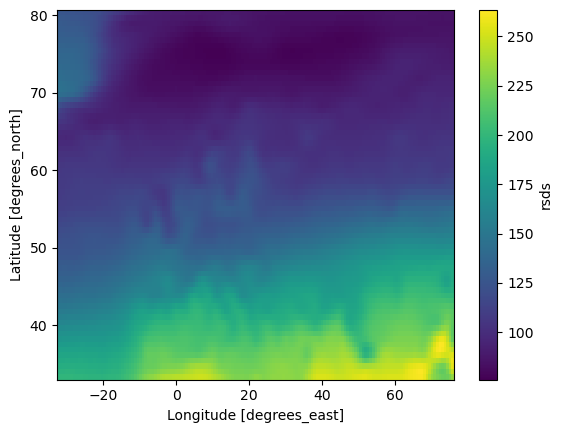

In [19]:
timemean_lentis.plot()